In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img_width = 66
img_height = 200
channels = 3

inputs = tf.keras.Input(shape=(img_height,img_width,channels,))
tf.image.per_image_standardization(inputs)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


<tf.Tensor 'per_image_standardization/Identity:0' shape=(None, 200, 66, 3) dtype=float32>

In [3]:
inputs.shape

TensorShape([None, 200, 66, 3])

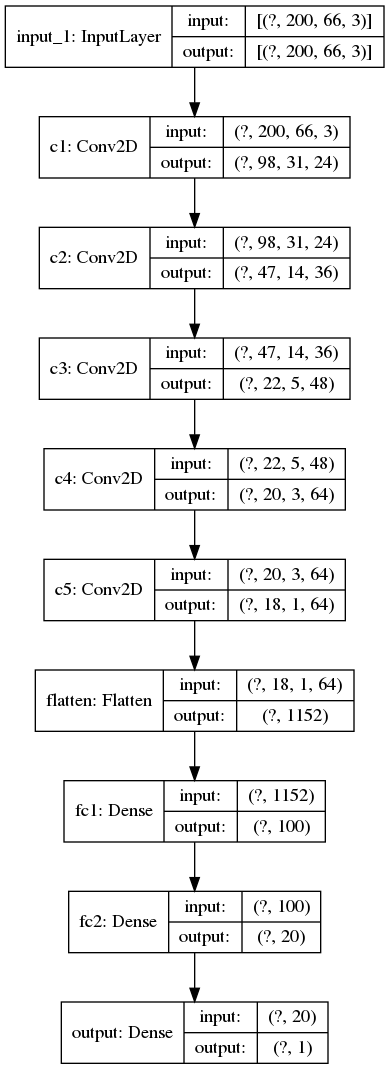

In [4]:
c1 = layers.Conv2D(24,(5,5),strides=(2,2),activation=tf.nn.relu, name = 'c1')(inputs)
c2 = layers.Conv2D(36,(5,5),strides=(2,2),activation=tf.nn.relu, name = 'c2')(c1)
c3 = layers.Conv2D(48,(5,5),strides=(2,2),activation=tf.nn.relu, name = 'c3')(c2)
c4 = layers.Conv2D(64,(3,3),activation=tf.nn.relu, name = 'c4')(c3)
c5 = layers.Conv2D(64,(3,3),activation=tf.nn.relu, name = 'c5')(c4)
flatten = layers.Flatten()(c5)
fc1 = layers.Dense(100,activation = tf.nn.relu, name='fc1')(flatten)
fc2 = layers.Dense(20,activation = tf.nn.relu, name='fc2')(fc1)
output = layers.Dense(1, name='output')(fc2)


model = keras.Model(inputs=inputs, outputs=output)
keras.utils.plot_model(model,show_shapes = True)

In [5]:
model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [7]:
inputs.shape

TensorShape([None, 200, 66, 3])

In [11]:
random = tf.random.normal(
    (img_height,img_width,channels,), mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None
)

random = tf.expand_dims(random,0)
random.shape

TensorShape([1, 200, 66, 3])

In [14]:
import time
t1 = time.time()
model.predict(random)
t2 = time.time()

print(t2-t1)

0.2573695182800293
